In [158]:
# Missing data generator

# dimension
# copula type - low rank gaussian copula, gaussian copula, student-t, clayton (asymmetric), frank
# sample size

# missingness
# one column
# multiple column - mononotonic
# multiple column - arbitrary

import random

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import pyvinecopulib as pv
from pyvinecopulib import RVineStructure, CVineStructure, DVineStructure
from gcimpute.helper_data import generate_sigma, generate_LRGC, generate_mixed_from_gc
from gcimpute.helper_mask import mask_MCAR as gcimpute_mask_MCAR

from statsmodels.distributions.empirical_distribution import ECDF
from vcimpute.generate_data import make_complete_data_matrix

def mask_MCAR(X, mask_fraction, d_mis=None, monotonic_missingness=False):
    n = X.shape[0]
    d = X.shape[1]
    
    if d_mis == 1:
        X_mask = np.copy(X)
        miss_idx = random.choice(list(range(d)))
        is_missing = np.random.binomial(n=1,p=mask_fraction,size=X_mask.shape[0]).astype(bool)
        X_mask[is_missing, miss_idx] = np.nan
    elif monotonic_missingness:
        assert d_mis < d
        X_mask = np.copy(X)
        for j in range(d - d_mis, d):
            is_missing = np.random.binomial(n=1,p=mask_fraction,size=n).astype(bool)
            X_mask[is_missing, j:] = np.nan
    else: 
        X_mask = gcimpute_mask_MCAR(X, mask_fraction=0.2)
    return X_mask

def characterize_dependence(X, var):
    pass2

In [159]:
X = make_complete_data_matrix(n=1000, d=10, copula_type='student', vine_structure='R')

In [161]:
X_mask = mask_MCAR(X, d_mis=1, mask_fraction=0.2)

In [162]:
np.count_nonzero(np.isnan(X_mask), axis=0)

array([  0,   0, 196,   0,   0,   0,   0,   0,   0,   0])

<AxesSubplot:>

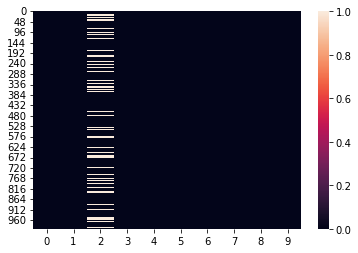

In [163]:
sns.heatmap(np.where(np.isnan(X_mask),1,0))